In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm



warnings.filterwarnings('ignore')

# Merge the stats with salary, drop useless columns, round numbers
data_recent = pd.read_csv("C:\\Users\\17667\\Desktop\\Python\\NYU Python course\\project\\NBA data\\data_recent.csv")
data_complete = data_recent.copy()
data_recent = data_recent[data_recent['season']<= 2023]
data_recent = data_recent[data_recent['GP']>=30]
data_recent = data_recent[data_recent['age']<=35]
data_recent = data_recent[data_recent['PPG']>0]


# Split the dataset based on position
guard_set = data_recent[data_recent['position'] == 'Guard']
forward_set = data_recent[(data_recent['position'] == 'Forward') + (data_recent['position'] == 'Forward-Guard')]
center_set = data_recent[(data_recent['position'] == 'Center') + (data_recent['position'] == 'Forward-Center') ]

# Input attributes
attributes = ['age', 'GP', 'W', 'L', 'MIN', 'PTS', 'FGM',
       'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-',
       'playoff', 'semi_final', 'conf_final', 'final', 'champ','PPG', 'FGAPG', '3PAPG',
       'REBPG', 'ASTPG', 'TOVPG', 'STLPG', 'BLKPG','PPM', 'FGAPM', '3PAPM',
        'REBPM', 'ASTPM', 'TOVPM', 'STLPM', 'BLKPM']

lengths = {
    "Length of Guard Set": len(guard_set),
    "Length of Forward Set": len(forward_set),
    "Length of Center Set": len(center_set),
}

lengths

{'Length of Guard Set': 2232,
 'Length of Forward Set': 1984,
 'Length of Center Set': 1168}

# Preliminary phase
During this phase, I will first run regression analysis on different positions sets to determine the optimal attributes and models to use for further analysis. I will start off with a list of selected attributes based on common logic and eliminate attributes based on the p-value.

In [52]:
attributes = ['age', 'FG%', '3P%', 'FT%','FP', 'DD2','+/-',
       'playoff', 'semi_final', 'conf_final', 'final', 'champ',
      'PPG','REBPG', 'ASTPG', 'TOVPG', 'STLPG', 'BLKPG','PPM']

## Guard

                            OLS Regression Results                            
Dep. Variable:                pct_cap   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     281.4
Date:                Mon, 18 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:20:20   Log-Likelihood:                 3563.8
No. Observations:                2232   AIC:                            -7102.
Df Residuals:                    2219   BIC:                            -7027.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0744      0.017     -4.329      0.0

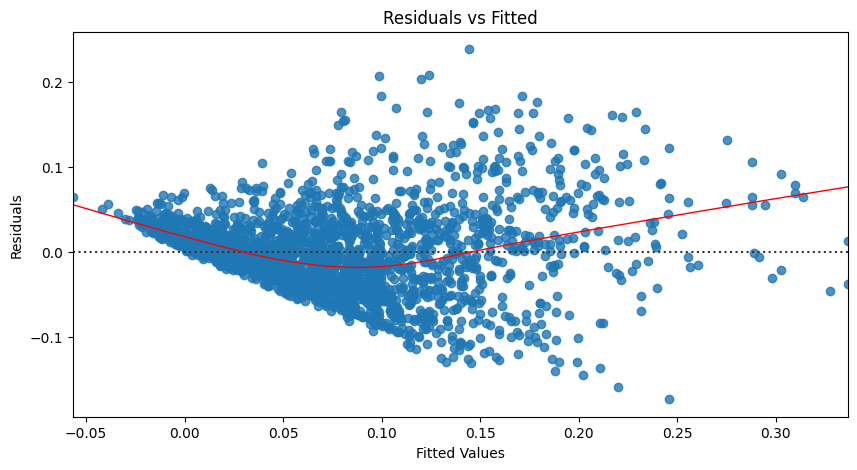

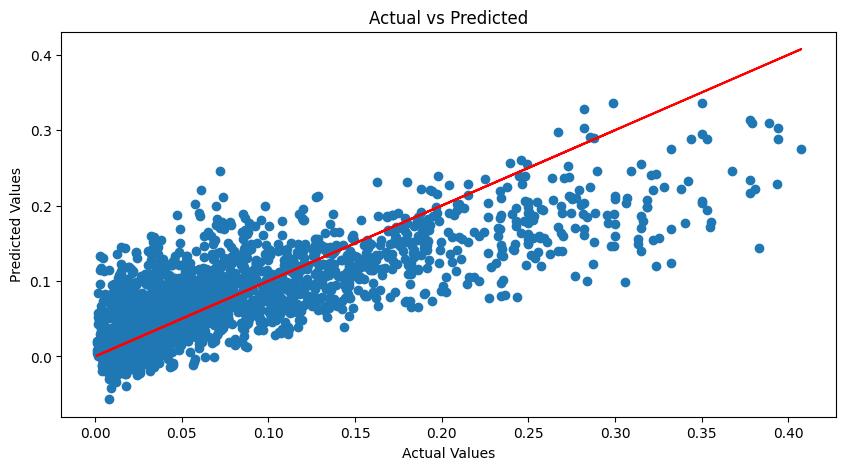

In [99]:
attributes = ['age', 'FG%', '3P%', 'FT%','FP', 'DD2','+/-','semi_final', 'PPG','REBPG', 'ASTPG', 'BLKPG']
# Adding a constant to the model (necessary for statsmodels)
X = sm.add_constant(guard_set[attributes])
y = guard_set['pct_cap']

# Running the regression model using statsmodels
model = sm.OLS(y, X).fit()

# Getting the summary of the model
print(model.summary())

# Plotting the Residuals
plt.figure(figsize=(10,5))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10,5))
plt.scatter(x=y, y=model.fittedvalues)
plt.plot(y, y, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

#### After deciding the attributes to include based OLS model, I explored the predictive power of several linear and non-linear models. This include: 
OLS  
Ridge   
Elastic Net  
Neural Networks   
Random Forest    
GradientBoostingRegressor

R-squared on test set (OLS): 0.6683460907307491
RMSE on test set (OLS): 0.053614190610735045


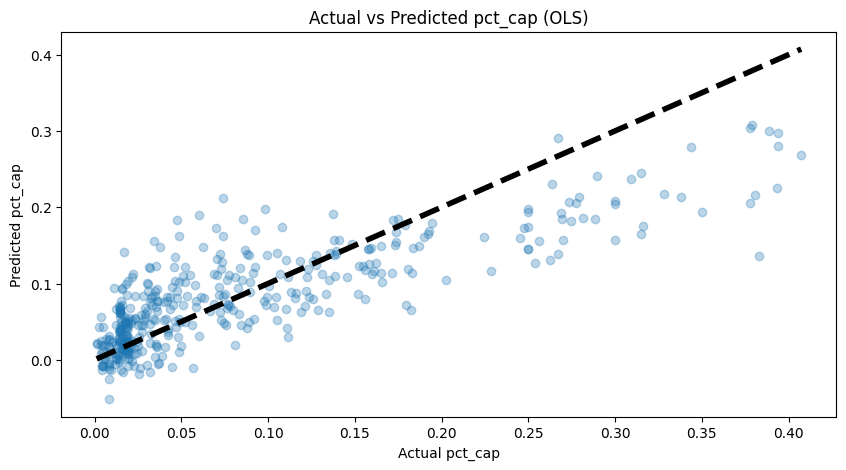

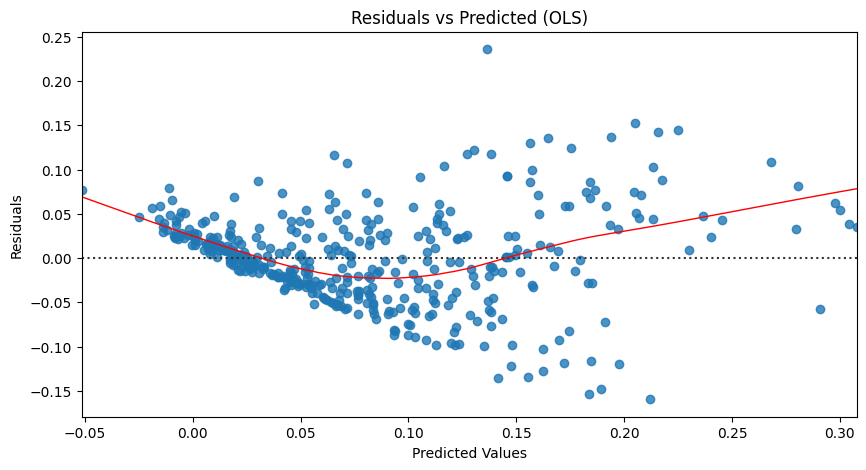

In [100]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

attributes = ['age', 'FG%', '3P%', 'FT%','FP', 'DD2','+/-','semi_final', 'PPG','REBPG', 'ASTPG', 'BLKPG']
# Assuming 'guard_set' has a column 'season' indicating the year of the season
train = guard_set[guard_set['season'] <= 2020]
test = guard_set[guard_set['season'] >= 2021]

# Define training data
X_train = sm.add_constant(train[attributes])
y_train = train['pct_cap']

# Define testing data
X_test = sm.add_constant(test[attributes])
y_test = test['pct_cap']

# Train the OLS model on the training set
model = sm.OLS(y_train, X_train).fit()

# Test the model on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's predictive power
# Calculate R-squared, RMSE, or other relevant statistics for the test set
r2_ols = r2_score(y_test, y_pred)
rmse_ols = mean_squared_error(y_test, y_pred, squared=False)
# Print the summary of the model
print(f"R-squared on test set (OLS): {r2_ols}")
print(f"RMSE on test set (OLS): {rmse_ols}")

# Visualize the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual pct_cap')
plt.ylabel('Predicted pct_cap')
plt.title('Actual vs Predicted pct_cap (OLS)')
plt.show()

# Visualize the residuals for the test set
plt.figure(figsize=(10,5))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (OLS)')
plt.show()



R-squared on test set(Random Forest): 0.7627545806120064
RMSE on test set(Random Forest): 0.045345700123857136


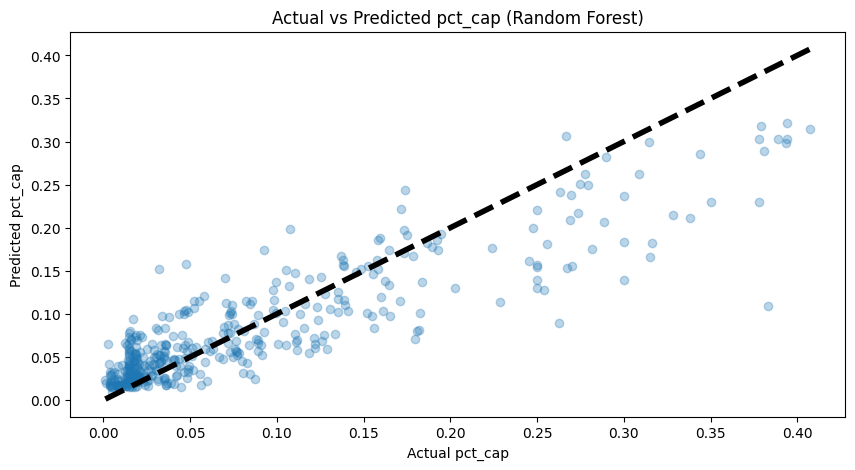

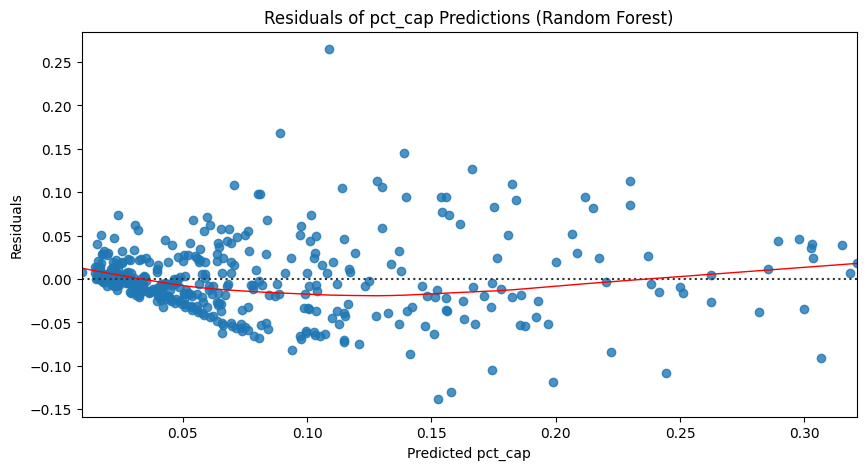

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'guard_set' has a column 'season' indicating the year of the season
# and that the necessary data preprocessing has been done
attributes = ['age', 'FG%', '3P%', 'FT%','FP', 'DD2','+/-','semi_final', 'PPG','REBPG', 'ASTPG', 'BLKPG']
# Split the dataset into training and testing based on the season
train = guard_set[guard_set['season'] <= 2020]
test = guard_set[guard_set['season'] >= 2021]

# Define training and testing sets
X_train = train[attributes]
y_train = train['pct_cap']
X_test = test[attributes]
y_test = test['pct_cap']

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf.predict(X_test)

# Calculate R-squared and RMSE for the test set
r2_rf = r2_score(y_test, y_pred)
rmse_rf = mean_squared_error(y_test, y_pred, squared=False)

# Output the R-squared and RMSE
print(f"R-squared on test set(Random Forest): {r2_rf}")
print(f"RMSE on test set(Random Forest): {rmse_rf}")

# Visualize the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual pct_cap')
plt.ylabel('Predicted pct_cap')
plt.title('Actual vs Predicted pct_cap (Random Forest)')
plt.show()

# Visualize the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True,line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted pct_cap')
plt.ylabel('Residuals')
plt.title('Residuals of pct_cap Predictions (Random Forest)')
plt.show()



R-squared on test set (Elastic Net): 0.35809421524170826
RMSE on test set (Elastic Net): 0.07458866572779661


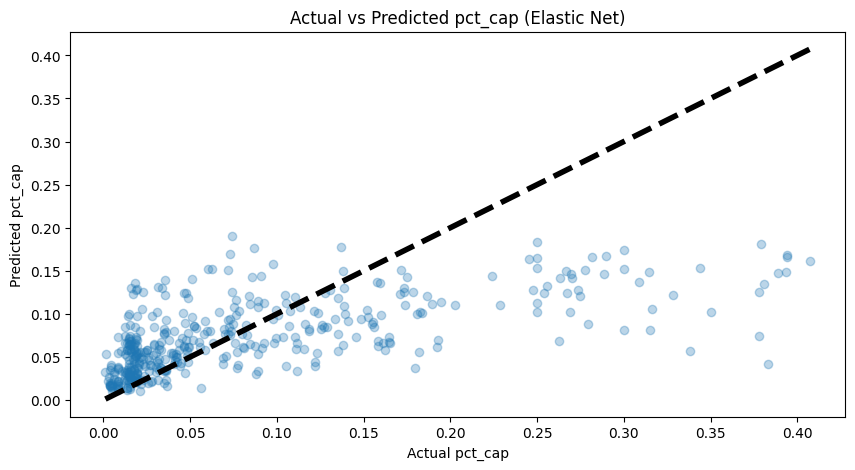

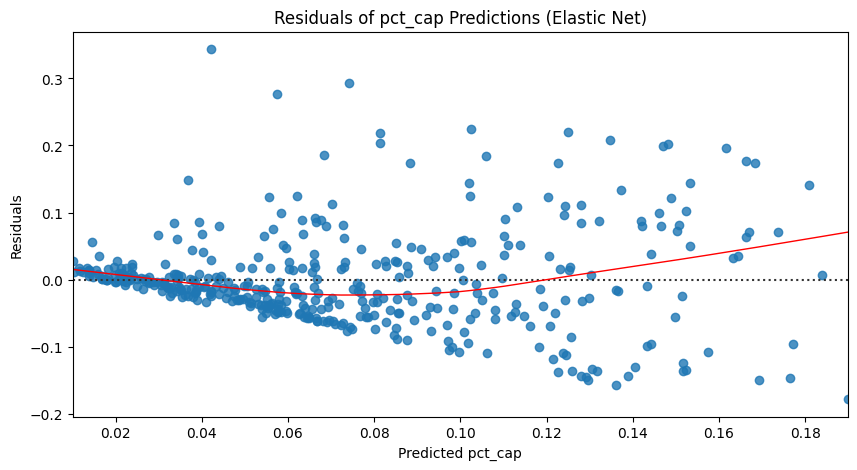

In [102]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

attributes = ['age', 'FG%', '3P%', 'FT%','FP', 'DD2','+/-','semi_final', 'PPG','REBPG', 'ASTPG', 'BLKPG']

# Define training and testing sets
X_train = train[attributes]
y_train = train['pct_cap']
X_test = test[attributes]
y_test = test['pct_cap']

# Initialize the Elastic Net model
en_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)

# Fit the model on the training data
en_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_en = en_model.predict(X_test)

# Calculate R-squared and RMSE for the test set
r2_en = r2_score(y_test, y_pred_en)
rmse_en = mean_squared_error(y_test, y_pred_en, squared=False)

# Output the R-squared and RMSE
print(f"R-squared on test set (Elastic Net): {r2_en}")
print(f"RMSE on test set (Elastic Net): {rmse_en}")

# Visualize the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_en, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual pct_cap')
plt.ylabel('Predicted pct_cap')
plt.title('Actual vs Predicted pct_cap (Elastic Net)')
plt.show()

# Visualize the residuals
residuals_en = y_test - y_pred_en
plt.figure(figsize=(10, 5))
sns.residplot(x=y_pred_en, y=residuals_en, lowess=True,line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted pct_cap')
plt.ylabel('Residuals')
plt.title('Residuals of pct_cap Predictions (Elastic Net)')
plt.show()



R-squared on test set (Ridge Regression): 0.6462596318820716
RMSE on test set (Ridge Regression): 0.053030013409154676


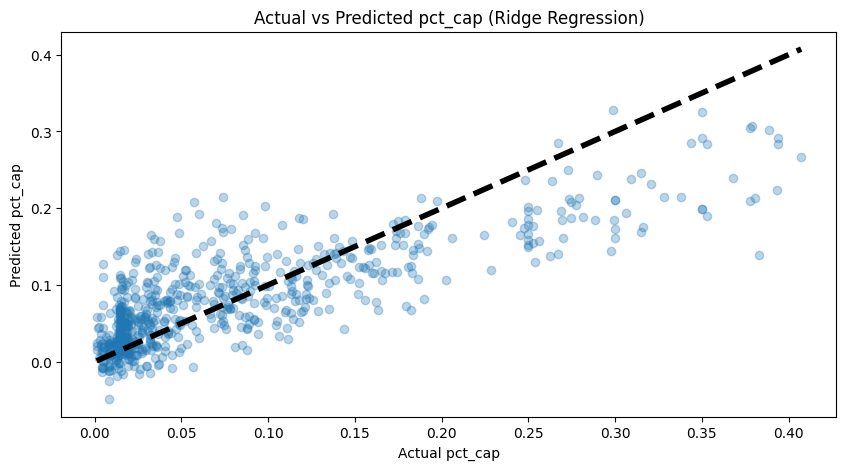

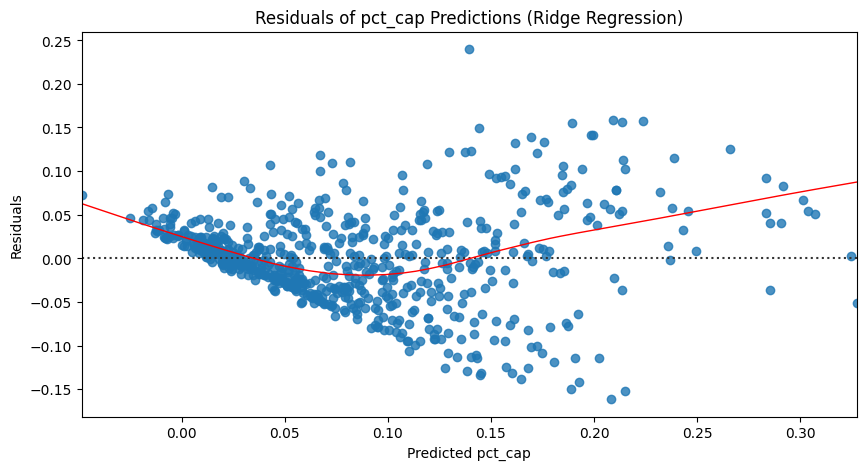

In [105]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'guard_set' has a column 'season' indicating the year of the season
# and that the necessary data preprocessing has been done
attributes = ['age', 'FG%', '3P%', 'FT%','FP', 'DD2','+/-','semi_final', 'PPG','REBPG', 'ASTPG', 'BLKPG']

# Define training and testing sets
X_train = train[attributes]
y_train = train['pct_cap']
X_test = test[attributes]
y_test = test['pct_cap']

# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_ridge = ridge_model.predict(X_test)

# Calculate R-squared and RMSE for the test set
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)

# Output the R-squared and RMSE
print(f"R-squared on test set (Ridge Regression): {r2_ridge}")
print(f"RMSE on test set (Ridge Regression): {rmse_ridge}")

# Visualize the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_ridge, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual pct_cap')
plt.ylabel('Predicted pct_cap')
plt.title('Actual vs Predicted pct_cap (Ridge Regression)')
plt.show()

# Visualize the residuals
residuals_ridge = y_test - y_pred_ridge
plt.figure(figsize=(10, 5))
sns.residplot(x=y_pred_ridge, y=residuals_ridge, lowess=True,line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted pct_cap')
plt.ylabel('Residuals')
plt.title('Residuals of pct_cap Predictions (Ridge Regression)')
plt.show()



R-squared on test set (Neural Network): 0.4262218916660453
RMSE on test set (Neural Network): 0.06753850022969994


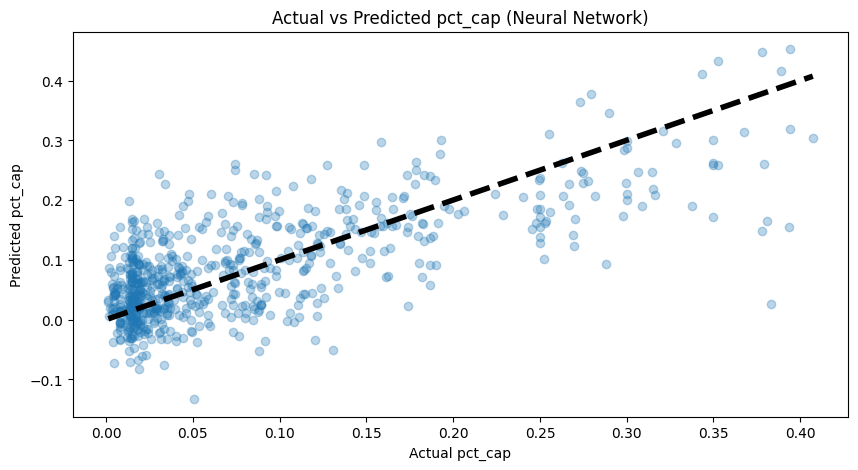

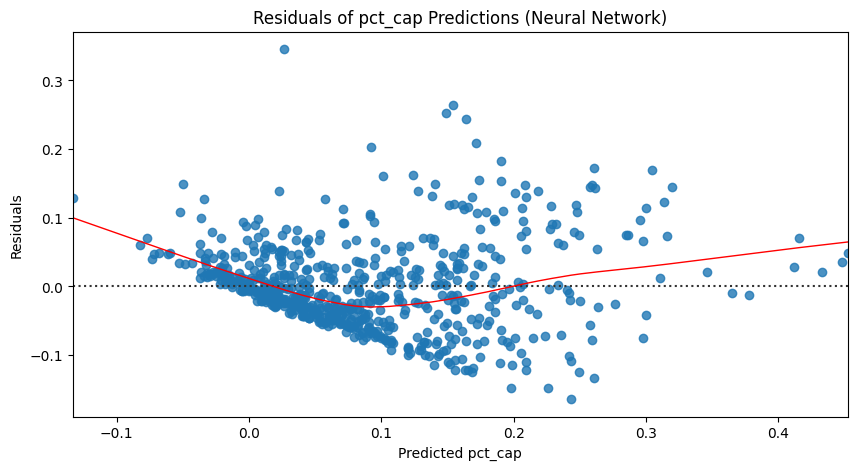

In [106]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming 'guard_set' has a column 'season' indicating the year of the season
# and that the necessary data preprocessing has been done
attributes = ['age', 'FG%', '3P%', 'FT%','FP', 'DD2','+/-','semi_final', 'PPG','REBPG', 'ASTPG', 'BLKPG']


# Define training and testing sets
X_train = train[attributes]
y_train = train['pct_cap']
X_test = test[attributes]
y_test = test['pct_cap']

# Standardizing the data (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Neural Network model
nn_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', 
                        solver='adam', max_iter=500, random_state=42)

# Fit the model on the training data
nn_model.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred_nn = nn_model.predict(X_test_scaled)

# Calculate R-squared and RMSE for the test set
r2_nn = r2_score(y_test, y_pred_nn)
rmse_nn = mean_squared_error(y_test, y_pred_nn, squared=False)

# Output the R-squared and RMSE
print(f"R-squared on test set (Neural Network): {r2_nn}")
print(f"RMSE on test set (Neural Network): {rmse_nn}")

# Visualize the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_nn, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual pct_cap')
plt.ylabel('Predicted pct_cap')
plt.title('Actual vs Predicted pct_cap (Neural Network)')
plt.show()

# Visualize the residuals
residuals_nn = y_test - y_pred_nn
plt.figure(figsize=(10, 5))
sns.residplot(x=y_pred_nn, y=residuals_nn, lowess=True,line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted pct_cap')
plt.ylabel('Residuals')
plt.title('Residuals of pct_cap Predictions (Neural Network)')
plt.show()



R-squared on test set (GBM): 0.7005067883084063
RMSE on test set (GBM): 0.0487947297254225


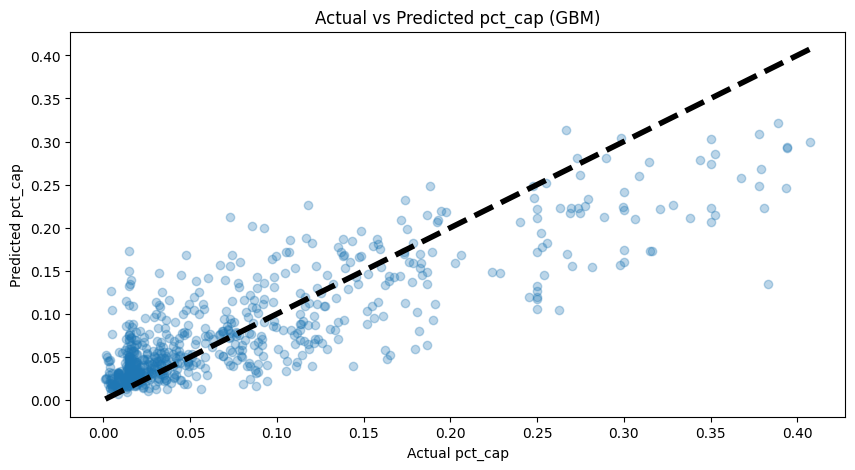

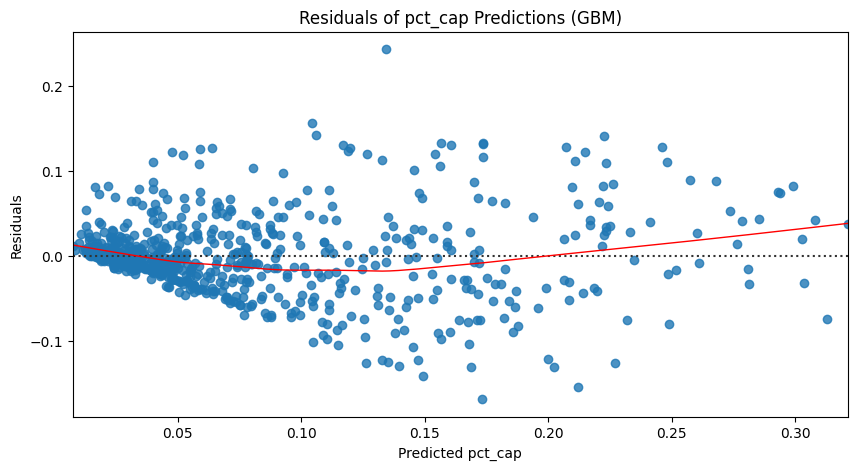

In [107]:
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.metrics import r2_score, mean_squared_error

    # Assuming 'guard_set' has a column 'season' indicating the year of the season
    # and that the necessary data preprocessing has been done
    attributes = ['age', 'FG%', '3P%', 'FT%','FP', 'DD2','+/-','semi_final', 'PPG','REBPG', 'ASTPG', 'BLKPG']

    # Define training and testing sets
    X_train = train[attributes]
    y_train = train['pct_cap']
    X_test = test[attributes]
    y_test = test['pct_cap']

    # Initialize the Gradient Boosting Regressor
    gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                          max_depth=3, random_state=42)

    # Fit the model on the training data
    gbm_model.fit(X_train, y_train)

    # Predict on the testing data
    y_pred_gbm = gbm_model.predict(X_test)

    # Calculate R-squared and RMSE for the test set
    r2_gbm = r2_score(y_test, y_pred_gbm)
    rmse_gbm = mean_squared_error(y_test, y_pred_gbm, squared=False)

    # Output the R-squared and RMSE
    print(f"R-squared on test set (GBM): {r2_gbm}")
    print(f"RMSE on test set (GBM): {rmse_gbm}")

    # Visualize the actual vs predicted values
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred_gbm, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Actual pct_cap')
    plt.ylabel('Predicted pct_cap')
    plt.title('Actual vs Predicted pct_cap (GBM)')
    plt.show()

    # Visualize the residuals
    residuals_gbm = y_test - y_pred_gbm
    plt.figure(figsize=(10, 5))
    sns.residplot(x=y_pred_gbm, y=residuals_gbm, lowess=True,line_kws={'color': 'red', 'lw': 1})
    plt.xlabel('Predicted pct_cap')
    plt.ylabel('Residuals')
    plt.title('Residuals of pct_cap Predictions (GBM)')
    plt.show()



## Conclusion: 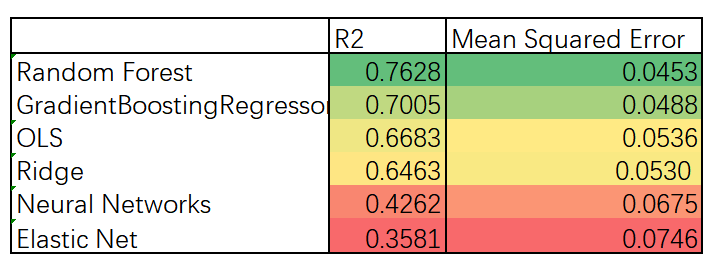
#### The best model is Random Forest

## Forward

                            OLS Regression Results                            
Dep. Variable:                pct_cap   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     330.3
Date:                Mon, 18 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:26:42   Log-Likelihood:                 3150.9
No. Observations:                1984   AIC:                            -6276.
Df Residuals:                    1971   BIC:                            -6203.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0730      0.016     -4.644      0.0

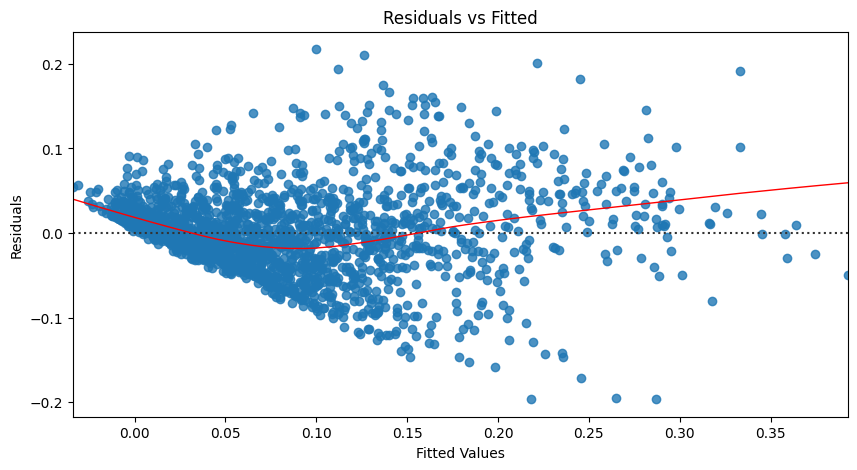

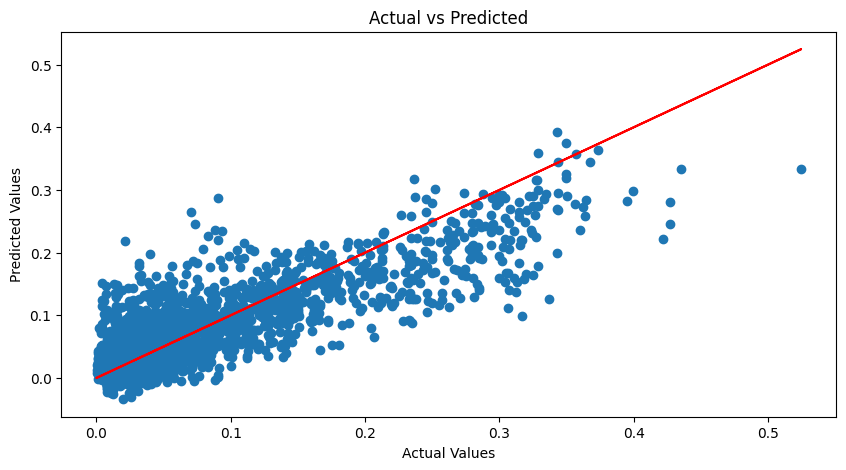

In [114]:
attributes = ['age', 'FG%', '3P%', 'FP', 'DD2','+/-',
       'playoff', 'PPG', 'ASTPG', 'TOVPG', 'BLKPG','PPM']
# Adding a constant to the model (necessary for statsmodels)
X = sm.add_constant(forward_set[attributes])
y = forward_set['pct_cap']

# Running the regression model using statsmodels
model = sm.OLS(y, X).fit()

# Getting the summary of the model
print(model.summary())

# Plotting the Residuals
plt.figure(figsize=(10,5))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10,5))
plt.scatter(x=y, y=model.fittedvalues)
plt.plot(y, y, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

## Center

                            OLS Regression Results                            
Dep. Variable:                pct_cap   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     117.9
Date:                Mon, 18 Dec 2023   Prob (F-statistic):          4.52e-180
Time:                        17:27:44   Log-Likelihood:                 1799.4
No. Observations:                1168   AIC:                            -3575.
Df Residuals:                    1156   BIC:                            -3514.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0620      0.022     -2.768      0.0

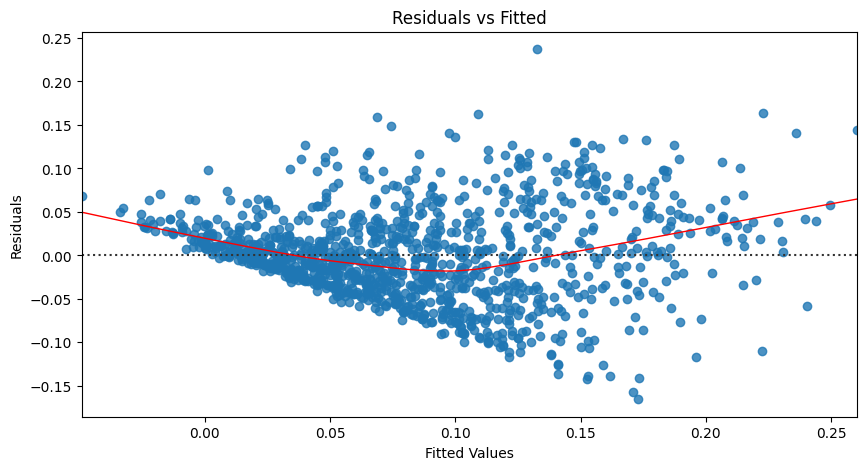

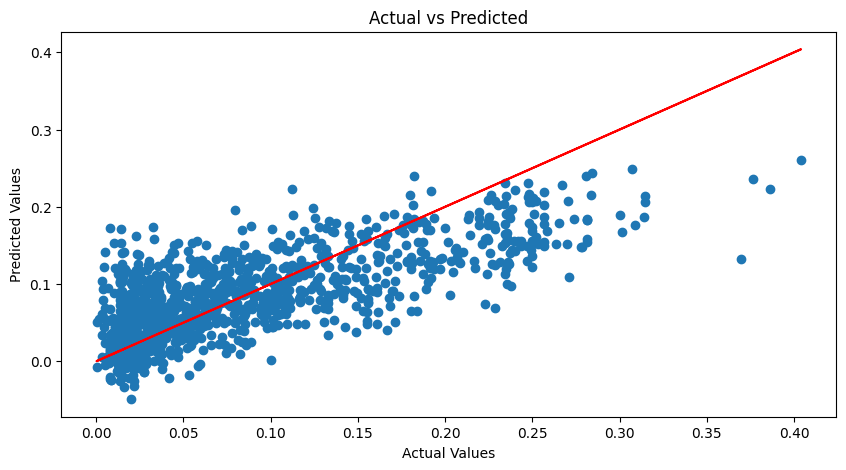

In [119]:
attributes = ['age', 'FG%','FT%','+/-','playoff', 'PPG','REBPG', 'TOVPG', 'STLPG', 'BLKPG','PPM']
# Adding a constant to the model (necessary for statsmodels)
X = sm.add_constant(center_set[attributes])
y = center_set['pct_cap']

# Running the regression model using statsmodels
model = sm.OLS(y, X).fit()

# Getting the summary of the model
print(model.summary())

# Plotting the Residuals
plt.figure(figsize=(10,5))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()


# Scatter plot of actual vs predicted values
plt.figure(figsize=(10,5))
plt.scatter(x=y, y=model.fittedvalues)
plt.plot(y, y, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

# Model Generation and Prediction
## Now that we have the best model and the attributes selected. We will train the model and value current NBA players

## Guard

In [142]:

attributes = ['age', 'FG%', '3P%', 'FT%','FP', 'DD2','+/-','semi_final', 'PPG','REBPG', 'ASTPG', 'BLKPG']

# Split the dataset into training and testing based on the season
train = guard_set

# Define training and testing sets
X_train = train[attributes]
y_train = train['pct_cap']

# Initialize the Gradient Boosting Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Assuming guard_set and the necessary data preprocessing has been done, 
# and the model has been trained as per the provided code.

# Filter the dataset for the 2024 season
test_2024 = data_complete[(data_complete['season'] == 2024)&(data_complete['position']=='Guard')]

# Define testing set for 2024
X_test_2024 = test_2024[attributes]
y_test_2024 = test_2024['pct_cap']

# Predict on the 2024 data
y_pred_2024 = rf.predict(X_test_2024)

# Calculate residuals for 2024
residuals_2024 = y_test_2024 - y_pred_2024

# Combine residuals with the test dataset to identify players
test_2024['predicted_pct_cap'] = y_pred_2024
test_2024['residual'] = residuals_2024

# Calculate the 1% and 99% percentiles of the residuals
lower_percentile_residual = np.percentile(test_2024['residual'], 5)
upper_percentile_residual = np.percentile(test_2024['residual'], 95)

# Filter out the rows where residuals are below the 1% or above the 99% percentile
filtered_test_2024 = test_2024[(test_2024['residual'] > lower_percentile_residual) & 
                               (test_2024['residual'] < upper_percentile_residual)]

# Sorting the filtered_test_2024 DataFrame by the residual column
sorted_test_2024 = filtered_test_2024.sort_values(by='residual', ascending=False)

# Getting the top 10 and last 10 players based on residual values
top_10_residuals = sorted_test_2024.head(10)[['player', 'age', 'salary', 'pct_cap', 'predicted_pct_cap', 'residual']]
last_10_residuals = sorted_test_2024.tail(10)[['player', 'age', 'salary', 'pct_cap', 'predicted_pct_cap', 'residual']]

top_10_residuals, last_10_residuals



(                       player  age    salary   pct_cap  predicted_pct_cap  \
 7295  Shai Gilgeous-Alexander   25  33386850  0.245454           0.016549   
 4437             Jrue Holiday   33  36861707  0.271000           0.046160   
 2171             Devin Booker   27  36016200  0.264784           0.040036   
 1039              CJ McCollum   32  35802469  0.263213           0.039063   
 1908             De'Aaron Fox   25  32600060  0.239669           0.016214   
 3534             James Harden   34  35640000  0.262018           0.047811   
 2302         Donovan Mitchell   27  33162030  0.243801           0.038977   
 3484             Jamal Murray   26  33833400  0.248737           0.050913   
 4303             Jordan Poole   24  27955357  0.205522           0.016133   
 1362               Chris Paul   38  30800000  0.226436           0.046476   
 
       residual  
 7295  0.228905  
 4437  0.224841  
 2171  0.224748  
 1039  0.224150  
 1908  0.223455  
 3534  0.214207  
 2302  0.20482

## Forward

In [144]:
#Assuming 'guard_set' has a column 'season' indicating the year of the season
# and that the necessary data preprocessing has been done
attributes = ['age', 'FG%', '3P%', 'FP', 'DD2','+/-',
       'playoff', 'PPG', 'ASTPG', 'TOVPG', 'BLKPG','PPM']

# Split the dataset into training and testing based on the season
train = forward_set

# Define training and testing sets
X_train = train[attributes]
y_train = train['pct_cap']

# Initialize the Gradient Boosting Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Assuming guard_set and the necessary data preprocessing has been done, 
# and the model has been trained as per the provided code.

# Filter the dataset for the 2024 season
test_2024 = data_complete[(data_complete['season'] == 2024)&((data_complete['position'] == 'Forward') + (data_complete['position'] == 'Forward-Guard'))]

# Define testing set for 2024
X_test_2024 = test_2024[attributes]
y_test_2024 = test_2024['pct_cap']

# Predict on the 2024 data
y_pred_2024 = rf.predict(X_test_2024)

# Calculate residuals for 2024
residuals_2024 = y_test_2024 - y_pred_2024

# Combine residuals with the test dataset to identify players
test_2024['predicted_pct_cap'] = y_pred_2024
test_2024['residual'] = residuals_2024

# Calculate the 1% and 99% percentiles of the residuals
lower_percentile_residual = np.percentile(test_2024['residual'], 5)
upper_percentile_residual = np.percentile(test_2024['residual'], 95)

# Filter out the rows where residuals are below the 1% or above the 99% percentile
filtered_test_2024 = test_2024[(test_2024['residual'] > lower_percentile_residual) & 
                               (test_2024['residual'] < upper_percentile_residual)]

# Sorting the filtered_test_2024 DataFrame by the residual column
sorted_test_2024 = filtered_test_2024.sort_values(by='residual', ascending=False)

# Getting the top 10 and last 10 players based on residual values
top_10_residuals = sorted_test_2024.head(10)[['player', 'age', 'salary', 'pct_cap', 'predicted_pct_cap', 'residual']]
last_10_residuals = sorted_test_2024.tail(10)[['player', 'age', 'salary', 'pct_cap', 'predicted_pct_cap', 'residual']]

top_10_residuals, last_10_residuals



(               player  age    salary   pct_cap  predicted_pct_cap  residual
 7825    Tobias Harris   31  39270150  0.288707           0.059849  0.228858
 859    Brandon Ingram   26  33833400  0.248737           0.023071  0.225666
 6435    Pascal Siakam   29  37893408  0.278585           0.059042  0.219543
 3820     Jayson Tatum   25  32600060  0.239669           0.045740  0.193930
 2947   Gordon Hayward   33  31500000  0.231582           0.056754  0.174828
 4848  Khris Middleton   32  29320988  0.215562           0.054655  0.160907
 3881     Jerami Grant   29  27586207  0.202808           0.042239  0.160570
 1073  Cameron Johnson   27  25679348  0.188790           0.029632  0.159157
 6647       RJ Barrett   23  23883929  0.175590           0.023868  0.151722
 4993       Kyle Kuzma   28  25568182  0.187972           0.044451  0.143521,
                       player  age   salary   pct_cap  predicted_pct_cap  \
 3446            Jalen Wilson   23   559782  0.004115           0.021321   


## Center

In [145]:
#Assuming 'guard_set' has a column 'season' indicating the year of the season
# and that the necessary data preprocessing has been done
attributes = ['age', 'FG%','FT%','+/-','playoff', 'PPG','REBPG', 'TOVPG', 'STLPG', 'BLKPG','PPM']

# Split the dataset into training and testing based on the season
train = center_set

# Define training and testing sets
X_train = train[attributes]
y_train = train['pct_cap']

# Initialize the Gradient Boosting Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Assuming guard_set and the necessary data preprocessing has been done, 
# and the model has been trained as per the provided code.

# Filter the dataset for the 2024 season
test_2024 = data_complete[(data_complete['season'] == 2024)&((data_complete['position'] == 'Center') + (data_complete['position'] == 'Forward-Center'))]

# Define testing set for 2024
X_test_2024 = test_2024[attributes]
y_test_2024 = test_2024['pct_cap']

# Predict on the 2024 data
y_pred_2024 = rf.predict(X_test_2024)

# Calculate residuals for 2024
residuals_2024 = y_test_2024 - y_pred_2024

# Combine residuals with the test dataset to identify players
test_2024['predicted_pct_cap'] = y_pred_2024
test_2024['residual'] = residuals_2024

# Calculate the 1% and 99% percentiles of the residuals
lower_percentile_residual = np.percentile(test_2024['residual'], 5)
upper_percentile_residual = np.percentile(test_2024['residual'], 95)

# Filter out the rows where residuals are below the 1% or above the 99% percentile
filtered_test_2024 = test_2024[(test_2024['residual'] > lower_percentile_residual) & 
                               (test_2024['residual'] < upper_percentile_residual)]

# Sorting the filtered_test_2024 DataFrame by the residual column
sorted_test_2024 = filtered_test_2024.sort_values(by='residual', ascending=False)

# Getting the top 10 and last 10 players based on residual values
top_10_residuals = sorted_test_2024.head(10)[['player', 'age', 'salary', 'pct_cap', 'predicted_pct_cap', 'residual']]
last_10_residuals = sorted_test_2024.tail(10)[['player', 'age', 'salary', 'pct_cap', 'predicted_pct_cap', 'residual']]

top_10_residuals, last_10_residuals



(                player  age    salary   pct_cap  predicted_pct_cap  residual
 2015     Deandre Ayton   25  32459438  0.238635           0.035722  0.202914
 2271  Domantas Sabonis   27  30600000  0.224965           0.044990  0.179975
 4466     Julius Randle   29  28226880  0.207519           0.034357  0.173161
 4123      John Collins   26  25340000  0.186295           0.036927  0.149367
 967        Brook Lopez   35  25000000  0.183795           0.036059  0.147736
 3662     Jarrett Allen   25  20000000  0.147036           0.032386  0.114650
 1440      Clint Capela   29  20616000  0.151565           0.044579  0.106986
 3409      Jakob Poeltl   28  19500000  0.143360           0.040959  0.102401
 5144   Lauri Markkanen   26  17259999  0.126892           0.026124  0.100768
 6285    Nikola Vucevic   33  18518519  0.136145           0.039737  0.096408,
                player  age   salary   pct_cap  predicted_pct_cap  residual
 1629     Damian Jones   28  2586665  0.019017           0.041900